In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
pd.set_option('display.max_columns', None)
# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [45]:
df = pd.read_csv("../../data/processed/3_aggregated_pueblos.csv")
df.shape
df = df.dropna(subset=['koppen_climate'])

In [46]:
df

df.query("total_population < 6000", inplace=True)
df.shape

(6670, 46)

In [47]:
df = df.drop(['cmun', 'municipality', 'towns_in_vicinity','province', 'autonomous_community', 'altitude','connectivity_category', 'description', 'closest_distance_airport', 'nearest_airport','nearest_train_station', 'closest_distance_train', 'closest_distance_hospital', 'nearest_hospital', 'closest_distance_school', 'nearest_school', 'longitude', 'latitude', 'male'], axis=1)

In [48]:
df

,0-17,18-24,25-34,35-54,55+,female,total_population,koppen_climate,number_of_houses,town_size,connectivity_score,economy_score,economy_score_area,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct,age_score,final_age_category
0,302,96,101,463,584,736,1546,Cfb,784.0,Mid,0.7180,4.10,16.823071,6,10,3.0,5.0,1,6,3.5,19.534282,6.209573,6.532988,29.948254,37.774903,17.302717,Balanced Town
1,265,119,160,648,1199,1218,2391,Csb,1277.0,Mid,0.8460,5.90,14.034524,4,10,2.0,5.0,10,6,8.0,11.083229,4.976997,6.691761,27.101631,50.146382,-10.664994,Highly Aging Town
2,119,61,95,364,694,667,1333,Cfb,788.0,Mid,0.6420,0.00,8.933750,3,10,1.5,5.0,6,6,6.0,8.927232,4.576144,7.126782,27.306827,52.063016,-13.840960,Highly Aging Town
3,58,28,32,113,151,181,382,Cfb,213.0,Small,0.7410,0.00,15.153360,4,10,2.0,5.0,1,6,3.5,15.183246,7.329843,8.376963,29.581152,39.528796,16.753927,Balanced Town
4,528,226,291,1016,1251,1662,3312,Cfb,1497.0,Big,0.9425,35.25,31.005961,10,10,5.0,5.0,1,10,5.5,15.942029,6.823671,8.786232,30.676329,37.771739,21.724034,Balanced Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7591,44,16,32,106,206,205,404,Csa,594.0,Small,0.6875,0.00,16.046490,6,10,3.0,5.0,6,4,5.0,10.891089,3.960396,7.920792,26.237624,50.990099,-11.881188,Highly Aging Town
7596,966,460,630,1791,1669,2651,5516,Csa,2385.0,Big,0.9660,14.70,68.529460,2,10,1.0,5.0,1,4,2.5,17.512690,8.339376,11.421320,32.469181,30.257433,43.255983,Young & Growing
7597,250,101,139,450,652,767,1592,Csa,1394.0,Mid,0.8270,4.75,22.540964,4,10,2.0,5.0,8,4,6.0,15.703518,6.344221,8.731156,28.266332,40.954774,12.625628,Balanced Town
7600,793,445,670,1564,1759,2542,5231,Csa,3415.0,Big,0.8190,14.70,34.694737,1,10,0.5,5.0,2,4,3.0,15.159625,8.506978,12.808258,29.898681,33.626458,36.111642,Young & Growing


In [49]:
# Define age group columns
age_groups = ["0-17", "18-24", "25-34", "35-54", "55+"]

# Sum only the age group columns
df["total_population"] = df[age_groups].sum(axis=1)

# Compute percentages for each age group
for col in age_groups:
    df[col + "_pct"] = (df[col] / df["total_population"]) * 100


In [50]:
df

,0-17,18-24,25-34,35-54,55+,female,total_population,koppen_climate,number_of_houses,town_size,connectivity_score,economy_score,economy_score_area,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct,age_score,final_age_category
0,302,96,101,463,584,736,1546,Cfb,784.0,Mid,0.7180,4.10,16.823071,6,10,3.0,5.0,1,6,3.5,19.534282,6.209573,6.532988,29.948254,37.774903,17.302717,Balanced Town
1,265,119,160,648,1199,1218,2391,Csb,1277.0,Mid,0.8460,5.90,14.034524,4,10,2.0,5.0,10,6,8.0,11.083229,4.976997,6.691761,27.101631,50.146382,-10.664994,Highly Aging Town
2,119,61,95,364,694,667,1333,Cfb,788.0,Mid,0.6420,0.00,8.933750,3,10,1.5,5.0,6,6,6.0,8.927232,4.576144,7.126782,27.306827,52.063016,-13.840960,Highly Aging Town
3,58,28,32,113,151,181,382,Cfb,213.0,Small,0.7410,0.00,15.153360,4,10,2.0,5.0,1,6,3.5,15.183246,7.329843,8.376963,29.581152,39.528796,16.753927,Balanced Town
4,528,226,291,1016,1251,1662,3312,Cfb,1497.0,Big,0.9425,35.25,31.005961,10,10,5.0,5.0,1,10,5.5,15.942029,6.823671,8.786232,30.676329,37.771739,21.724034,Balanced Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7591,44,16,32,106,206,205,404,Csa,594.0,Small,0.6875,0.00,16.046490,6,10,3.0,5.0,6,4,5.0,10.891089,3.960396,7.920792,26.237624,50.990099,-11.881188,Highly Aging Town
7596,966,460,630,1791,1669,2651,5516,Csa,2385.0,Big,0.9660,14.70,68.529460,2,10,1.0,5.0,1,4,2.5,17.512690,8.339376,11.421320,32.469181,30.257433,43.255983,Young & Growing
7597,250,101,139,450,652,767,1592,Csa,1394.0,Mid,0.8270,4.75,22.540964,4,10,2.0,5.0,8,4,6.0,15.703518,6.344221,8.731156,28.266332,40.954774,12.625628,Balanced Town
7600,793,445,670,1564,1759,2542,5231,Csa,3415.0,Big,0.8190,14.70,34.694737,1,10,0.5,5.0,2,4,3.0,15.159625,8.506978,12.808258,29.898681,33.626458,36.111642,Young & Growing


In [51]:
df.columns

Index(['0-17', '18-24', '25-34', '35-54', '55+', 'female', 'total_population',
       'koppen_climate', 'number_of_houses', 'town_size', 'connectivity_score',
       'economy_score', 'economy_score_area', 'hospital_distance_score',
       'school_distance_score', 'hospital_score_area', 'school_score_area',
       'train_distance_score', 'airport_distance_score', 'transport_score',
       '0-17_pct', '18-24_pct', '25-34_pct', '35-54_pct', '55+_pct',
       'age_score', 'final_age_category'],
      dtype='object')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Balanced Town'),
  Text(1, 0, 'Highly Aging Town'),
  Text(2, 0, 'Young & Growing'),
  Text(3, 0, 'Aging Town'),
  Text(4, 0, 'Very Young Town')])

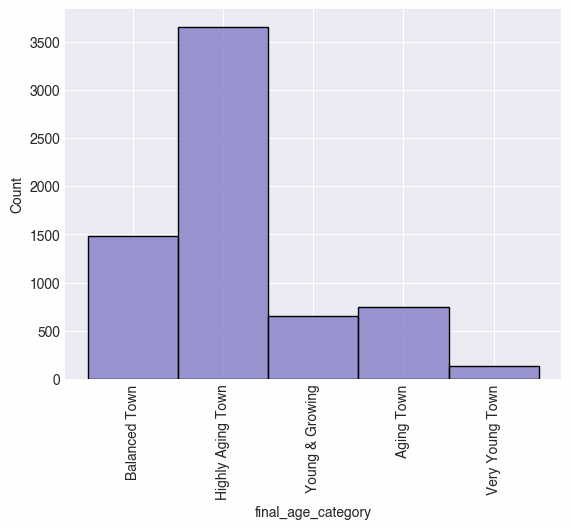

In [52]:
sns.histplot(df["final_age_category"])
plt.xticks(rotation=90)

In [ ]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
scaler = StandardScaler()

pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first', sparse_output=False))
])

pipeline.fit(df[['koppen_climate', 'town_size', 'final_age_category']])

Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse_output=False))])

In [54]:
fe_transformer = ColumnTransformer(transformers=[
    ('transf_cat', pipeline, ['koppen_climate']),
    ('scaled', scaler, [
         'connectivity_score',
        'economy_score', 'economy_score_area',
        'hospital_distance_score', 'school_distance_score', 'hospital_score_area',
        'school_score_area', 'train_distance_score', 'airport_distance_score', 'transport_score'
    ])
], remainder='drop')

fe_transformer.fit(df)

ColumnTransformer(transformers=[('transf_cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['koppen_climate']),
                                ('scaled', StandardScaler(),
                                 ['connectivity_score', 'economy_score',
                                  'economy_score_area',
                                  'hospital_distance_score',
                                  'school_distance_score',
                                  'hospital_score_area', 'school_score_area',
                                  'train_distance_score',
                                  'airport_distance_score',
                                  'transport_score'])])

In [ ]:
df_train = fe_transformer.transform(df)


(6670, 15)

In [56]:
pd.DataFrame(df_train).to_csv("../../data/processed/cluster_model_train.csv", index=False)